In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal

### Linear Discriminant Analysis (Gaussian)

/Users/jamesmontgomery/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: covariance is not positive-semidefinite.


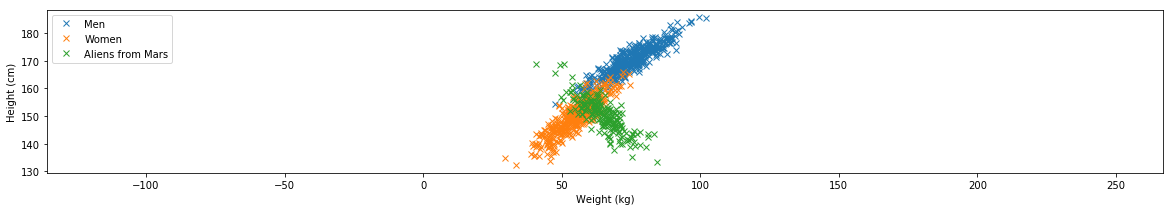

In [2]:
# initialize our data
n = 1000
X = np.zeros((n,2)) 
y = np.zeros((n, 3))

# class probabilities
true_theta = [0.4, 0.4, 0.2] 

#class means
true_means = [
              [75, 170], #men
              [55, 150], #women
              [65, 150]  #aliens
             ]

#class covariances
true_cov = [[[80, 50], [-5, 2]],
            [[60, 50], [-8, 2]],
            [[60, -50], [8, 2]]
           ]

for i in xrange(n):    
    # sample a class label
    y[i,:] = np.random.multinomial(1, true_theta, size=1).flatten()
    c = np.argmax(y[i,:])
    # sample the corresponding features.
    X[i,:] = np.random.multivariate_normal(true_means[c], true_cov[c], 1).flatten()
    
plt.figure(figsize=(20,3))
plt.plot(X[y[:,0]==1,0], X[y[:,0]==1,1], 'x', label='Men')
plt.plot(X[y[:,1]==1,0], X[y[:,1]==1,1], 'x', label='Women')
plt.plot(X[y[:,2]==1,0], X[y[:,2]==1,1], 'x', label='Aliens from Mars')
plt.axis('equal')
plt.xlabel('Weight (kg)')
plt.ylabel('Height (cm)')
plt.legend(loc=2)
plt.show()

In [34]:
class gaussian_discriminant_analysis(object):
    def __init__(self):
        self.means = []
        self.covariances = []
        self.phi = None
        self.n_classes = None
        
    def preprocess(self,x,y=None):
        if len(x.shape) == 1:
            x = x.reshape(-1,1)
        if y is not None:
            if len(y.shape) == 1:
                n_classes = np.unique(y).shape[0]
                y = y.reshape(-1)
                y = np.eye(n_classes)[y]
            else:
                n_classes = y.shape[1]
        else:
            n_classes = None
        return x,y,n_classes
    
    def find_means(self,x,y):
        for i in range(self.n_classes):
            n_class = 1.0*(y[:,i] == 1).sum()
            mu_class = 1.0/n_class * x[y[:,i] == 1, :].sum(axis=0)
            self.means.append(mu_class)
        self.means = np.array(self.means)
    
    def find_sigma(self,x,y,n):
        mus = np.broadcast_to(self.means, (n,self.n_classes,x.shape[1]))
        idx = y.argmax(axis=1)
        mus = np.array([mus[a,i,:] for a,i in enumerate(idx)])
        
        r = np.matrix(x - mus)
        self.covariances = (1.0 / n) * (r.T * r)
    
    def train(self,x,y):
        x,y,n_classes = self.preprocess(x,y)
        n = x.shape[0]
                
        # distribution over classes
        self.phi = y.mean(axis=0)
        
        self.n_classes = n_classes
        self.find_means(x,y)
        self.find_sigma(x,y,n)
        
    def predict(self,x):
        x,_,_ = self.preprocess(x)
        
        pred = []
        for i in range(self.n_classes):
            p = self.phi[i]*multivariate_normal.pdf(x,mean=self.means[i],cov=self.covariances)
            pred.append(p)
        pred = np.array(pred)
        return pred.argmax(axis=0)
        

In [35]:
model = gaussian_discriminant_analysis()
model.train(X,y)
predictions = model.predict(X)

In [36]:
y_true = y.argmax(axis=1)
acc = 100.0 - 100.0 * predictions[predictions != y_true].shape[0] / predictions.shape[0]
print "Accuracy: {}%".format(acc)

Accuracy: 86.7%
